# RP28 analysis and 2D graphics


The objective of this example is to present problem 28 of the BBRC. We also present graphic elements for the visualization of the limit state surface in 2 dimensions.

In [1]:
import openturns as ot
import numpy as np
import otbenchmark as otb

In [2]:
problem = otb.ReliabilityProblem28()

In [3]:
print(problem)

name = RP28
event = class=ThresholdEventImplementation antecedent=class=CompositeRandomVector function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x1,x2,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[y0] formulas=[x1 * x2] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[y0] formulas=[x1 * x2] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2] outputVariablesNames=[y0] formulas=[x1 * x2] antecedent=class=UsualRandomVector distribution=class=ComposedDistribution name=ComposedDistribution dimension=2 copula=class=IndependentCopula name=IndependentCopula dimension=2 marginal[0]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[78064] sigma=cl

In [4]:
event = problem.getEvent()
g = event.getFunction()

In [5]:
problem.getProbability()

1.4532945550025393e-07

In [6]:
# Create the Monte-Carlo algorithm
algoProb = ot.ProbabilitySimulationAlgorithm(event)
algoProb.setMaximumOuterSampling(10000)
algoProb.setBlockSize(128)
algoProb.setMaximumCoefficientOfVariation(0.01)
algoProb.run()

In [7]:
# Get the results
resultAlgo = algoProb.getResult()
neval = g.getEvaluationCallsNumber()
print("Number of function calls = %d" % (neval))
pf = resultAlgo.getProbabilityEstimate()
print("Failure Probability = %.4f (* 1.e-7)" % (pf * 1.0e7))
level = 0.95
c95 = resultAlgo.getConfidenceLength(level)
pmin = pf - 0.5 * c95
pmax = pf + 0.5 * c95
print(
    "%.1f %% confidence interval :[%.4f,%.4f] * 1.e-7 "
    % (level * 100, pmin * 1.0e7, pmax * 1.0e7)
)

Number of function calls = 1280000
Failure Probability = 0.0000 (* 1.e-7)
95.0 % confidence interval :[0.0000,0.0000] * 1.e-7 


## Compute the bounds of the domain

In [8]:
inputVector = event.getAntecedent()
distribution = inputVector.getDistribution()
X1 = distribution.getMarginal(0)
X2 = distribution.getMarginal(1)
alphaMin = 1.0e-8
alphaMax = 1.0 - alphaMin
lowerBound = ot.Point(
    [X1.computeQuantile(alphaMin)[0], X2.computeQuantile(alphaMin)[0]]
)
upperBound = ot.Point(
    [X1.computeQuantile(alphaMax)[0], X2.computeQuantile(alphaMax)[0]]
)

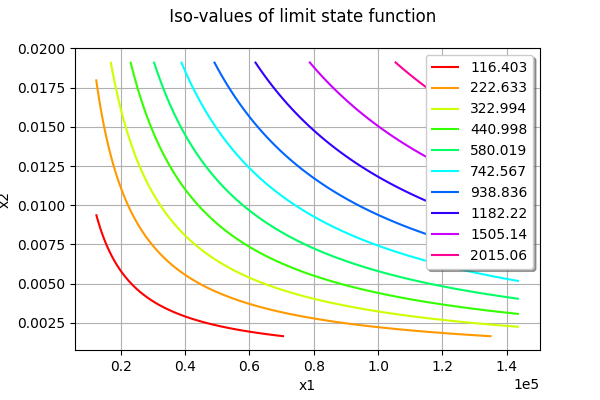

In [9]:
nbPoints = [100, 100]
figure = g.draw(lowerBound, upperBound, nbPoints)
figure.setTitle(" Iso-values of limit state function")
figure

## Print the iso-values of the distribution

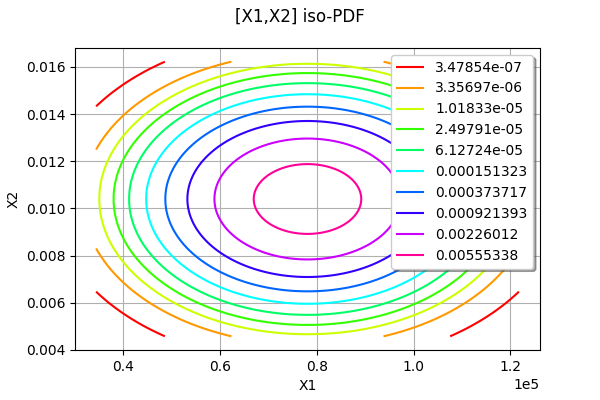

In [10]:
distribution.drawPDF()

In [11]:
sampleSize = 100000
drawEvent = otb.DrawEvent(event)

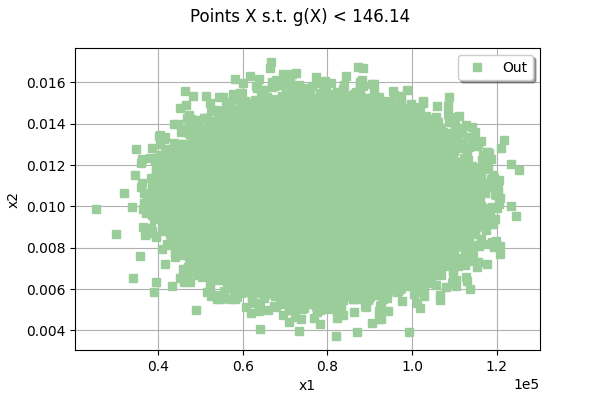

In [12]:
cloud = drawEvent.drawSampleCrossCut(sampleSize)
cloud

## Draw the limit state surface

In [13]:
bounds = ot.Interval(lowerBound, upperBound)

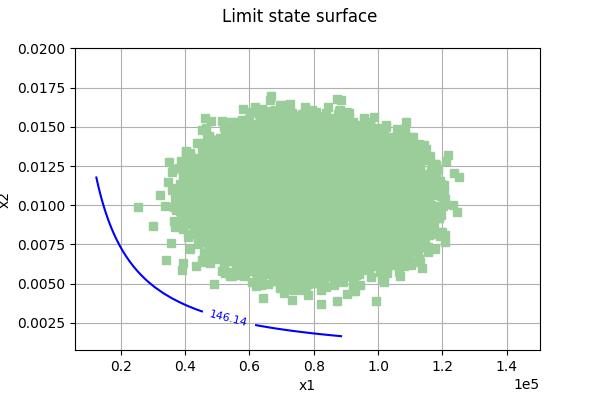

In [14]:
graph = drawEvent.drawLimitStateCrossCut(bounds)
graph.add(cloud)
graph

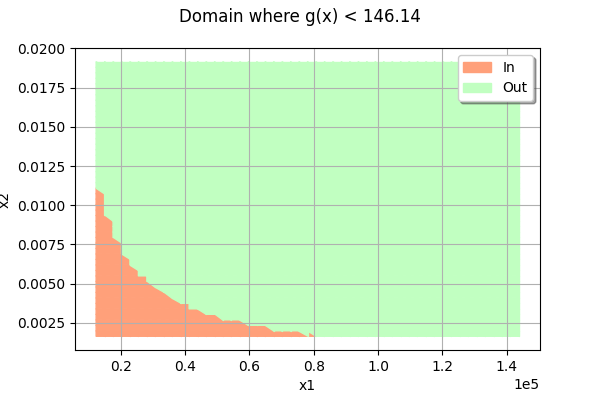

In [15]:
domain = drawEvent.fillEventCrossCut(bounds)
domain

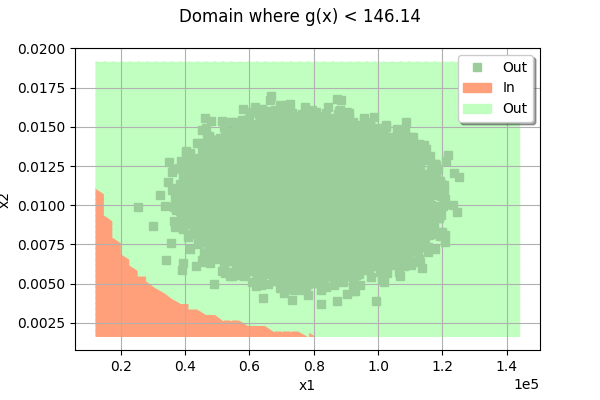

In [16]:
domain.add(cloud)
domain